# Mid-semester assignment Part 1 - Basics of deep learning
Hello dear students,<br> this is the template notebook. Please upload it into your drive and open as Google Colab nootebook".

---
<br>

### Name and ID:
Student 1: Tommy Afek
<br>
Student 2: Stav Elizur

## Fashion MNIST
Fashion MNIST dataset contains 70,000 grayscale images in 10 categories. The images show individual articles of clothing at low resolution (28 by 28 pixels), as seen here:

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  
</table>



Loading the dataset returns four NumPy arrays:

* The `train_images` and `train_labels` arrays are the *training set*—the data the model uses to learn.
* The model is tested against the *test set*, the `test_images`, and `test_labels` arrays.

The images are 28x28 NumPy arrays, with pixel values ranging between 0 and 255. The *labels* are an array of integers, ranging from 0 to 9. These correspond to the *class* of clothing the image represents:

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

<br>

# Goodluck!

#Neural Network in plain NumPy

## Import Libraries

In [ ]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


## Load Dataset

In [ ]:
X, y = fetch_openml('Fashion-MNIST', version=1, return_X_y=True, as_frame=False)
print(X.shape, y.shape)

(70000, 784) (70000,)


## Data preprocessing (10%)

### Feature scaling

In [ ]:
examples = y.shape[0]
y1 = y.reshape(1, examples)
X1 = X / 255
X1 = X1.T
print(X1.shape)

(784, 70000)


### Select two classes

In [ ]:
#select two classes (for example 2-Pullover and 4-Coat) !!!
dress_class = '3'
ankle_boot_class = '9'
X1 = np.asarray([(X1)[:,i] for i in range(X1.shape[1]) if y1[:,i][0] == ankle_boot_class or y1[:,i][0] == dress_class])
y1 = np.asarray([y1[:,i] for i in range(y1.shape[1]) if y1[:,i][0] == ankle_boot_class or y1[:,i][0] == dress_class])
print(X1.shape, y1.shape)

(14000, 784) (14000, 1)


### Split the data into Train set and Test set

In [ ]:
# Split the data into Train set and Test set (The use of libraries other than Numpy is strictly prohibited)
from sklearn.utils import shuffle

X = X1
Y = np.asmatrix([(int(y1[i,0])-int(dress_class))/(int(ankle_boot_class)-int(dress_class)) for i in range(y1.shape[0])]).T
# Use shuffle on the train data
X, y = shuffle(X, Y)
test_count = 2000
X_train, X_test = X[:len(X)-test_count].T, X[len(X)-test_count:len(X)].T
print(X_train.shape, X_test.shape)
Y_train, Y_test = np.asarray(y[:len(y)-test_count]).reshape(len(y)-test_count, 1), np.asarray(y[len(y)-test_count:len(y)]).reshape(test_count,1)
print(Y_train.shape, Y_test.shape)


(784, 12000) (784, 2000)
(12000, 1) (2000, 1)


### Test yourself

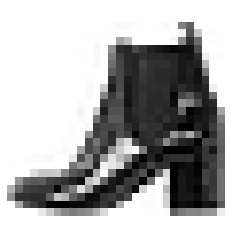

1.0

In [ ]:
# Test yourself (Check that the classes you have selected are actually displayed)
%matplotlib inline
from numpy import random

i = random.randint(100)
plt.imshow(X_train[:,i].reshape(28,28), cmap = matplotlib.cm.binary)
plt.axis("off")
plt.show()
Y_train[i,0]

## Activation functions (10%)

In [ ]:
# Sigmoid activation function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

## Loss function (20%)
BCE Loss function captures the intuition that the neural network should pay a high penalty(Loss→∞) when the estimated probability, with respect to the training example’s label, is completely wrong. On the other hand, the Loss should equal zero(Loss=0) when the estimated probability, with respect to the training example’s label, is correct. Simply put, the BCE Loss should equal zero in only two instances:<br>
* if the example is positively labeled(y=1) the neural network model should be completely sure that the example belongs to the positive class i.e p̂=1.
* if the example is negatively labeled(y=0) the neural network model should be completely sure that the example does not belong to the positive class i.e p̂=0.

<b> When we work with a computer, there are very high values or very low values that it cannot handle and that could cause the system to crash. <br>In order to overcome the case where the function returns values that strive for infinity you will need to understand which range of values causes the logarithm to return inf \ -inf and handle this within the function. </b>

In [ ]:
# Binary cross entropy
def log_loss(y_hat, y):
    '''
    Logistic loss, assuming a single value in y_hat and y.
    '''
    return -(y * np.log(y_hat) + (1-y) * np.log(1 - y_hat))

## NN Hyper Parameters

In [ ]:
input_layer = X_train.shape[0] # 28X28 = 784
hidden_layer = 12
learning_rate = 0.1
epochs = 20

## Weight and Bias Initialization

In [ ]:
W1 = np.random.randn(hidden_layer, input_layer)
b1 = np.zeros((hidden_layer, 1))
W2 = np.random.randn(1, hidden_layer)
b2 = np.zeros((1, 1))

print(W1.shape)
print(b1.shape)
print(W2.shape)
print(b2.shape)

(12, 784)
(12, 1)
(1, 12)
(1, 1)


## Training (30%)

In [ ]:
X = X_train
Y = Y_train
loss_list = []
epoch_list = []
numOfTraining = X_train.shape[1] # Write the number of examples in your train set
for i in range(epochs):
  avg_epoch_loss = 0
  for j in range(numOfTraining):
    # Forward propagation

    Z1 = np.matmul(W1, np.asmatrix(X[:,j]).T) + b1
    A1 = np.asmatrix([sigmoid((Z1)[i,0]) for i in range(Z1.shape[0])])
    Z2 = np.matmul(W2, A1.T) + b2
    A2 = [sigmoid((Z2)[i, 0]) for i in range(Z2.shape[0])][0]
    Yout = Y_train[j,0]

    # Compute loss
    loss = log_loss( A2, Yout)
    avg_epoch_loss = avg_epoch_loss + loss

    # Back propagation
    dZ2 = (A2-Yout)
    dW2 = dZ2 * A1
    db2 = dZ2

    dA1 = dZ2 * W2
    dZ1 = np.matmul(np.asmatrix([((A1)[0, i])*(1-(A1)[0, i]) for i in range(A1.shape[1])]) ,W2.T) * dZ2
    dW1 = np.matmul(dZ1 ,np.asmatrix(X[:,j]))
    db1 = dZ1

    # Update weights
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1

  avg_epoch_loss = avg_epoch_loss/numOfTraining
  loss_list.append(avg_epoch_loss)
  epoch_list.append(i)
  print("Epoch", i," Loss:", avg_epoch_loss)

Epoch 0  Loss: 0.02484706260382271
Epoch 1  Loss: 0.0029812677758328837
Epoch 2  Loss: 0.002298739487463072
Epoch 3  Loss: 0.0016915120241502827
Epoch 4  Loss: 0.0010853452858469472
Epoch 5  Loss: 0.0009298036352772696
Epoch 6  Loss: 0.0007368228362072332
Epoch 7  Loss: 0.0005247229533416395
Epoch 8  Loss: 0.0003673965213536405
Epoch 9  Loss: 0.0002961772200211234
Epoch 10  Loss: 0.00025448724371872344
Epoch 11  Loss: 0.00022513118307427741
Epoch 12  Loss: 0.00020277745957825944
Epoch 13  Loss: 0.0001848771830815592
Epoch 14  Loss: 0.00017006232504048776
Epoch 15  Loss: 0.00015752124749884123
Epoch 16  Loss: 0.00014672962459326205
Epoch 17  Loss: 0.00013732587903726146
Epoch 18  Loss: 0.00012904846094098987
Epoch 19  Loss: 0.00012170140169555088


### Loss Visualization

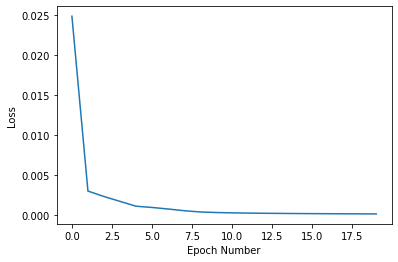

In [ ]:
import matplotlib.pyplot as plt
plt.xlabel('Epoch Number')
plt.ylabel("Loss")
plt.plot(epoch_list, loss_list)

## Results

### Test your performance (30%)

In [ ]:
# Forward batch of examples
X = X_test
Y = Y_test
Z1 = np.matmul(W1, X_test) + b1
A1 = np.asmatrix([([sigmoid((Z1)[i,j]) for j in range(Z1.shape[1])]) for i in range(Z1.shape[0])])
Z2 = np.matmul(W2, A1) + b2
A2 = np.asmatrix([([sigmoid((Z2)[i,j]) for j in range(Z2.shape[1])]) for i in range(Z2.shape[0])])

predictions = np.zeros((1,Y.shape[0]))
labels = np.zeros((1,Y.shape[0]))

# Check your predictions against the test's labels
for i in range(Y.shape[0]):
  if (A2[0,i] > 0.5):
    predictions[0,i] = 1
  labels[0,i] = Y[i,0]


# Print the confusion matrix In order to test your performance
print(confusion_matrix(predictions.T, labels.T))
# Print Accuracy Score
print("accuracy: ", accuracy_score(predictions.T, labels.T))

[[ 971    0]
 [   0 1029]]
accuracy:  1.0


### Visualize the results

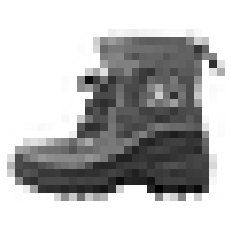

Real= 1.0 Predicted= [[0.631739]]


In [ ]:
# SHOW VISUALLY RESULTS ON 10 TEST EXAMPLES
%matplotlib inline
from numpy import random

i = random.randint(2000)
plt.imshow(X_test[:,i].reshape(28,28), cmap = matplotlib.cm.binary)
plt.axis("off")
plt.show()
Y_test[i,0]

Z1 = np.matmul(W1,X_test[:,i])
A1 = np.asmatrix([([sigmoid((Z1)[i,j]) for j in range(Z1.shape[1])]) for i in range(Z1.shape[0])])
Z2 = np.matmul(W2, A1.T)
A2 = np.asmatrix([([sigmoid((Z2)[i,j]) for j in range(Z2.shape[1])]) for i in range(Z2.shape[0])])
Yout = Y[i,0]
print("Real=", Y_test[i,0], "Predicted=",A2)